In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [618]:
df=pd.read_excel('PassEventsForwardFootball.xlsx')

In [619]:
df.isForward = df.isForward.replace({True: 1, False: 0})
df.isSucceeded = df.isSucceeded.replace({True: 1, False: 0})
df.Team=df.Team.replace({'Team Forward Football_1':0,'Team Forward Football_2':1}) # first team 1-> number 1,but seems that it's better to have classified value begin from 0
df['Pass type']=df['Pass type'].replace({"Forward pass":0,"Lateral pass":1,"Backward pass":2})
df['Pressure level']=df['Pressure level'].replace({"Full Pressure":2,"Limited Pressure":1,"No Pressure":0})
df['Zone']=df['Zone'].replace({'Attack':0,'Defence':1,'Mid field':2})
df['Playing direction_first half']=df['Playing direction_first half'].replace({'left':0,'right':1})
df['Playing direction_second half']=df['Playing direction_second half'].replace({'left':0,'right':1})

In [620]:
df['pass_x']=df["posX_passer"]-df["received_PosX"]
df['pass_y']=df["posY_passer"]-df["received_PosY"]

In [621]:
df.Player_id

0       95582
1       95582
2       95582
3       95582
4       95582
        ...  
1137    95597
1138    95597
1139    95597
1140    95597
1141    95597
Name: Player_id, Length: 1142, dtype: int64

In [622]:
# evidence for history of player
set1 = set(df[df.Team==0]['Player_id'])
set2= set(df[df.Team==1]['Player_id'])

print(set1)
print(set2)
overlap = set1.intersection(set2)
print(overlap)



{95579, 95580, 95581, 95582, 95583, 95584, 95585, 95586, 95587, 95588, 95589, 95591, 95592, 95593, 95594, 95595, 95597, 95600, 95601, 95986, 95987, 95603, 95988, 95602}
{95617, 95618, 95624, 95581, 95582, 95583, 95584, 95585, 95586, 95587, 95588, 95589, 95591, 95592, 95593, 95594, 95597, 95600, 95601, 95602, 95987, 95988, 95986}
{95581, 95582, 95583, 95584, 95585, 95586, 95587, 95588, 95589, 95591, 95592, 95593, 95594, 95597, 95600, 95601, 95602, 95987, 95988, 95986}


In [623]:
# --------------------------------------------------------- observe

# conclusion: from the sorted TimeStamp, I found that there are two matches rather than two teams in one match-> more obvious, day is different->done

df_team_one=df[df.Team==0]
df_team_two=df[df.Team==1]

# df_team_one.sort_values('TimeStamp') # check the starting and ending time of each team



In [624]:
# df_team_two.sort_values('TimeStamp')

# *********************************************************

In [625]:
# ---------------------------------------------------------

# df.groupby(['Player_id']).size() 

# calculate this in order to make sure there is no player with just a single line data
# -> avoid when splitting dataset, there is no solution to split into training and test dataset
# -> the result is positive-> done

# *********************************************************

In [626]:
# ---------------------------------------------------------
def print_column_name(df):
    for col in df:
        print("column name:",col)
# print_column_name(df)


# feature expansion
# 1. this is obvious that the distance between passer and receicver has the influence on if the pass is successful
# -> found that Pass length has been calculated->done
# -> but angle of start is also informative-> angle is also calculated->done
# 2. the difference between startTime and the start time have an influence on the physical strength-> done
# 3. if the exact position or the interval of position has an influence on the result-> generate features,check the correlation-> how to use it ??? we have automately feature selection

# 4. note that former part is more team 1, later part is for team 2, then there is also the overlap records, try to use time to generate features !!!
# time can also use Time block, or calculated time using minus
# -> how many opponents appear in 5s in a exact scope
# -> how many friends appear in 5s or around 5s in a exact score
# -> how many rival passes
# -> how many friends passes 
# -> how many rivals and friends in a certain fields.

# 5. Angle passe is for ridian, maybe degree is better ???-> not sure,but don't think so, just leave this idea here ==

# about time period for the first match and second match or not? -> just two matches->done

# consider the success rate of pass of one player-> should done after split->done

# outlier?-> not in this project

In [627]:
df=df_team_one

In [628]:
# def add_scope(df,window_size='10s'): # mean distance, min distance, in zone also
df.set_index('TimeStamp', drop=True, inplace=True)

In [629]:
df = df.sort_index()

In [630]:
df

,Type,posX_passer,posY_passer,received_PosX,received_PosY,isForward,isSucceeded,receiverId,Player_id,Team,...,Playing direction_first half,Playing direction_second half,x_pitchsize,y_pitchsize,Pressure level,Distance to first opponent,Outpassed opponents,total_passes,pass_x,pass_y
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2022-05-05 11:36:14,Pass,49,33,55,29,0,1,95594.0,95602,0,...,0,0,99,63,0,8.800000,0,23,-6,4
2022-05-05 11:36:16,Pass,55,28,36,39,1,0,NaN,95594,0,...,0,0,99,63,0,5.656854,1,20,19,-11
2022-05-05 11:36:18,Pass,39,40,37,45,0,1,95589.0,95581,0,...,1,1,99,63,0,4.440721,0,26,2,-5
2022-05-05 11:36:24,Pass,46,44,56,39,0,1,95579.0,95601,0,...,0,0,99,63,2,1.000000,0,58,-10,5
2022-05-05 11:36:27,Pass,57,36,46,19,0,1,95597.0,95579,0,...,0,0,99,63,1,2.126029,1,39,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-05 12:41:27,Pass,98,45,80,42,1,1,95583.0,95603,0,...,0,0,99,63,0,30.907604,0,16,18,3
2022-05-05 12:41:35,Pass,73,39,65,36,1,1,95601.0,95583,0,...,0,0,99,63,1,2.973214,1,34,8,3
2022-05-05 12:41:39,Pass,63,30,45,8,0,1,95597.0,95601,0,...,0,0,99,63,0,5.261179,1,58,18,22


In [631]:
window=df['Zone'].rolling('10s')

def count_same_zone(x, current_player):
    return x[x == current_player].count()

df['player_num_in_same_zone'] = window.apply(lambda x: count_same_zone(x, x[0]), raw=False)


In [632]:

# !!! return (num_players, rate) is not allowed in lambda function this case, don't know why
# !!! don't know how to do this, windows, two columns, lambda??? -> calculate the success rate in the same zone, mean

In [633]:
df=df.reset_index()

In [634]:
df

,TimeStamp,Type,posX_passer,posY_passer,received_PosX,received_PosY,isForward,isSucceeded,receiverId,Player_id,...,Playing direction_second half,x_pitchsize,y_pitchsize,Pressure level,Distance to first opponent,Outpassed opponents,total_passes,pass_x,pass_y,player_num_in_same_zone
0,2022-05-05 11:36:14,Pass,49,33,55,29,0,1,95594.0,95602,...,0,99,63,0,8.800000,0,23,-6,4,1.0
1,2022-05-05 11:36:16,Pass,55,28,36,39,1,0,NaN,95594,...,0,99,63,0,5.656854,1,20,19,-11,2.0
2,2022-05-05 11:36:18,Pass,39,40,37,45,0,1,95589.0,95581,...,1,99,63,0,4.440721,0,26,2,-5,3.0
3,2022-05-05 11:36:24,Pass,46,44,56,39,0,1,95579.0,95601,...,0,99,63,2,1.000000,0,58,-10,5,3.0
4,2022-05-05 11:36:27,Pass,57,36,46,19,0,1,95597.0,95579,...,0,99,63,1,2.126029,1,39,11,17,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2022-05-05 12:41:27,Pass,98,45,80,42,1,1,95583.0,95603,...,0,99,63,0,30.907604,0,16,18,3,1.0
623,2022-05-05 12:41:35,Pass,73,39,65,36,1,1,95601.0,95583,...,0,99,63,1,2.973214,1,34,8,3,2.0
624,2022-05-05 12:41:39,Pass,63,30,45,8,0,1,95597.0,95601,...,0,99,63,0,5.261179,1,58,18,22,1.0
625,2022-05-05 12:41:44,Pass,44,9,35,24,0,0,NaN,95597,...,0,99,63,1,2.607681,1,25,9,-15,1.0


In [635]:
# the scale is for per second, we don't need to extract more
# just have two matches, not periodic, so not informatie-> discard ???

df['pass_year']=pd.DatetimeIndex(df['TimeStamp']).year
df['pass_month']=pd.DatetimeIndex(df['TimeStamp']).month
df['pass_day']=pd.DatetimeIndex(df['TimeStamp']).day
df['pass_hour']=pd.DatetimeIndex(df['TimeStamp']).hour
df['pass_minute']=pd.DatetimeIndex(df['TimeStamp']).minute
df['pass_second']=pd.DatetimeIndex(df['TimeStamp']).second


In [636]:
df['start_year']=pd.DatetimeIndex(df['startTime']).year
df['start_month']=pd.DatetimeIndex(df['startTime']).month
df['start_day']=pd.DatetimeIndex(df['startTime']).day
df['start_hour']=pd.DatetimeIndex(df['startTime']).hour
df['start_minute']=pd.DatetimeIndex(df['startTime']).minute
df['start_second']=pd.DatetimeIndex(df['startTime']).second

In [637]:
df['time_process']=pd.DatetimeIndex(df['TimeStamp'])-pd.DatetimeIndex(df['startTime'])

In [638]:
# df['time_process']

# note that there is no month or year, so
# df['time_process_year']=df['time_process'].dt.components.years
# df['time_process_month']=df['time_process'].dt.components.months
# is not needed at all

In [639]:
df['time_process_day']=df['time_process'].dt.components.days
df['time_process_hour']=df['time_process'].dt.components.hours
df['time_process_minute']=df['time_process'].dt.components.minutes
df['time_process_second']=df['time_process'].dt.components.seconds

In [640]:
def drop_columns(df,lst_columns):
    return df.drop(columns=lst_columns,axis=1)
def drop_columns_with_one_unique_value(df):
    return drop_columns(df,get_columns_with_one_unique_value(df))

def get_columns_with_one_unique_value(df):
    col_counts = df.nunique()
    cols_with_one_unique_value = col_counts[col_counts == 1]
    return list(cols_with_one_unique_value.index)

In [641]:

# there will be a lot of columns that are not informative( just have one unique value), then check how many here
# get_columns_with_one_unique_value(df)

In [642]:

def print_unique_value(df):
    for col in df:
        print("column name:",col)
        print(df[col].unique())
        print("---")
# print_unique_value(df)

# from the result, we could see that columns
# Type, x_pitchsize, y_pitchsize each have just one unique value->done
# Club has just one unique vale ['Team Forward Football']-> done


# isForward and isSucceeded are either True or False, then convert them to numerical value 0 and 1 in order to better process-> done
# Team is either ['Team Forward Football_1' 'Team Forward Football_2'], then convert them to numerical value 0 and 1 -> done
# Pass type ['Forward pass' 'Lateral pass' 'Backward pass']-> 0,1,2->done
# Pressure level -> ['Full Pressure' 'No Pressure' 'Limited Pressure']->done
# column name: Zone ['Attack' 'Defence' 'Mid field']->0,1,2
# column name: Playing direction_first half
# ['left' 'right']
# column name: Playing direction_second half
# ['left' 'right']

# matchDuration is written in minutes and also just have two values-> don't need to convert



In [644]:
def get_none_percent(df):
    return df.isna().sum()/df.shape[0]
def get_none_num(df):
    return df.isna().sum()

# get_none_percent(df)


In [645]:
def compute_lenght(df):
    import math
    length=np.sqrt((df['posX_passer']-df['received_PosX'])**2+(df['posY_passer']-df['received_PosY'])**2)
    return length

In [646]:
fill_series=compute_lenght(df)

In [647]:
# df["Pass length"]=df["Pass length"].fillna(compute_lenght(df)) # actually it's not allowed, will fill in with a function not the return value of this function
df["Pass length"]=df["Pass length"].fillna(fill_series)

In [648]:
# found that there is no receivedId if isSucceed is false, check if they have the one-to-one relation
# -> the answer is yes, so receivedId is also the answer!!! we can't use it in training a model
# -> just delete it (receivedId)->done

# 1-df['isSucceeded'].sum()/df.shape[0]

# even the pass is not successful, then there is a expected sending point and a received point, so all the Pass length could be calculated
# -> the missing value of Pass length is solved-> done



In [649]:
# considering about the imbalance of isSucceeded

# print("successful:",df['isSucceeded'].sum()/df.shape[0])
# print("failure:",1-df['isSucceeded'].sum()/df.shape[0])

# -> not so balanced
# -> so try to interpolate the minor class or reduce the major class or using another score metric *** different choice
# -> which is suitable? but imbalanced data is not series, so tring score metric, for example, f1 score


In [650]:
import math
def get_degree(ridian):
    return ridian/math.pi*180
def get_ridian(degree):
    return degree*math.pi/180

In [651]:
# Define a custom function that returns the data type of a column
def check_dtype(col):
    return col.dtype
    
# Apply the custom function to each column of the DataFrame
# df.apply(check_dtype)

In [652]:
lst_delete=['TimeStamp','startTime','time_process','Team'] # receivedId is also informative, so don't delete it, 'time_process' is discarded, just two match, not informative->done
lst_one_value=get_columns_with_one_unique_value(df)
# print(lst_one_value)


In [653]:
df=drop_columns(df,lst_delete+lst_one_value)

In [654]:
df.receiverId

0      95594.0
1          NaN
2      95589.0
3      95579.0
4      95597.0
        ...   
622    95583.0
623    95601.0
624    95597.0
625        NaN
626    95594.0
Name: receiverId, Length: 627, dtype: float64

In [655]:
import seaborn as sns
def get_distribution_of_each_column(df):
    # Loop over the features
    for col in df:
        # Select the feature
        feature = df[col]
        
        # Plot the distribution of the feature
        sns.histplot(feature)
        plt.show()

def get_distribution_columns(df,col_lst):
    # Loop over the features
    for col in col_lst:
        # Select the feature
        feature = df[col]
        
        # Plot the distribution of the feature
        sns.histplot(feature)
        plt.show()
# get_distribution_of_each_column(df) 
# found that Pass length and Distance to first oppoment have log distribution

In [656]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(output_distribution='normal')
df['Pass length'] = transformer.fit_transform(df['Pass length'].values.reshape(-1,1))
df['Distance to first opponent'] = transformer.fit_transform(df['Distance to first opponent'].values.reshape(-1,1))

/Users/horus_liang/opt/anaconda3/envs/intro_to_ds/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (627). n_quantiles is set to n_samples.
  warnings.warn(
/Users/horus_liang/opt/anaconda3/envs/intro_to_ds/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (627). n_quantiles is set to n_samples.
  warnings.warn(


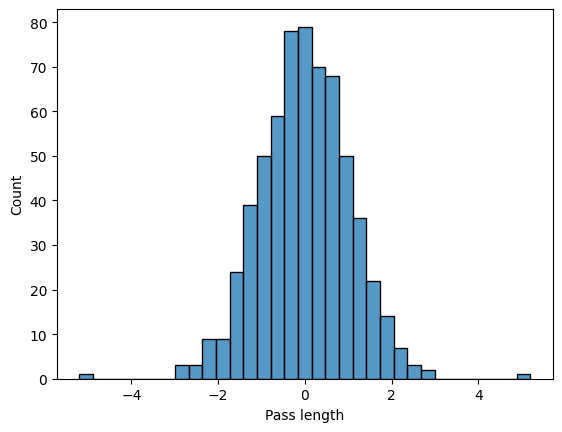

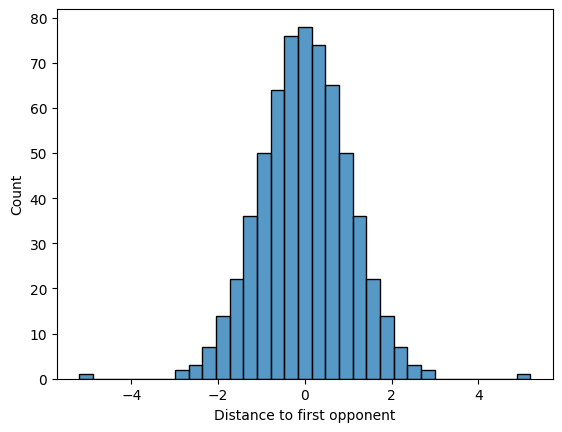

In [657]:
get_distribution_columns(df,['Pass length','Distance to first opponent']) # found that normal distribution has been transformed successfully

In [658]:
df

,posX_passer,posY_passer,received_PosX,received_PosY,isForward,isSucceeded,receiverId,Player_id,Time block,Zone,...,total_passes,pass_x,pass_y,player_num_in_same_zone,pass_hour,pass_minute,pass_second,time_process_hour,time_process_minute,time_process_second
0,49,33,55,29,0,1,95594.0,95602,1,2,...,23,-6,4,1.0,11,36,14,0,0,1
1,55,28,36,39,1,0,NaN,95594,1,2,...,20,19,-11,2.0,11,36,16,0,0,3
2,39,40,37,45,0,1,95589.0,95581,1,2,...,26,2,-5,3.0,11,36,18,0,0,5
3,46,44,56,39,0,1,95579.0,95601,1,2,...,58,-10,5,3.0,11,36,24,0,0,11
4,57,36,46,19,0,1,95597.0,95579,1,2,...,39,11,17,3.0,11,36,27,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,98,45,80,42,1,1,95583.0,95603,6,1,...,16,18,3,1.0,12,41,27,1,5,14
623,73,39,65,36,1,1,95601.0,95583,6,1,...,34,8,3,2.0,12,41,35,1,5,22
624,63,30,45,8,0,1,95597.0,95601,6,2,...,58,18,22,1.0,12,41,39,1,5,26
625,44,9,35,24,0,0,NaN,95597,6,2,...,25,9,-15,1.0,12,41,44,1,5,31


In [659]:
# generate bin values
num_bins = 4
df['angle_bins'] = pd.qcut(df['Angle Passe'], num_bins)

In [660]:
lst=df['angle_bins'].unique()
my_dic={}
my_dict = {}
for i, val in enumerate(lst):
    my_dict[val] = i

In [661]:
df.angle_bins = df.angle_bins.replace(my_dict)

In [662]:
# Save the DataFrame to a CSV file
df.to_csv("generated_data.csv",index=False)